In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from scipy import stats
import numpy as np

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# create a common alpha
alpha =  0.003/30

# zTest Function
def zTest(df,df1,df2,column, alpha):
    z, p = sms.weightstats.ztest(df1[column],df2[column],alternative ='two-sided', usevar='pooled')
    # print('Z statistic: ', round(z,3))
    if p<= alpha:
        print('***The Groups Have Different Means***')
    print('Probablility They Have Same Mean: ', round(p,5))
    # print('Standard Error of All VPG: ', round(stats.sem(df[column]),3))
    t = smss.CompareMeans(smss.DescrStatsW(df1[column]),smss.DescrStatsW(df2[column])).tconfint_diff(usevar='pooled', alpha =alpha)
    print('Range of True Difference in Means: (',round(t[0],3),':', round(t[1],3),')')

# list diffence function   
def listDiff(first, second):
    second = set(second)
    return [item for item in first if item not in second]


In [3]:
# import data
df = pd.read_csv('BGVSpringboardData.csv')

In [4]:
#Set TourID to index
df= df.set_index('TourID_dimension')
dic={'Sale':1.0,'No Sale':0.0}

df['ResultOfTour']=df['ResultOfTour'].replace(dic)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14445 entries, 146456 to 381090
Data columns (total 11 columns):
Age                           14445 non-null int64
AgentLine                     14445 non-null object
BookingWindow                 14445 non-null object
FirstGenVsOwner               14445 non-null object
HHIncomeRanges                14445 non-null object
Homeowner                     14445 non-null object
InState                       14445 non-null object
Programs (Budget)             14445 non-null object
relationStatus                14445 non-null object
ResultOfTour                  14445 non-null float64
NetVolumePlusNonGoodVolume    14445 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ MB
None


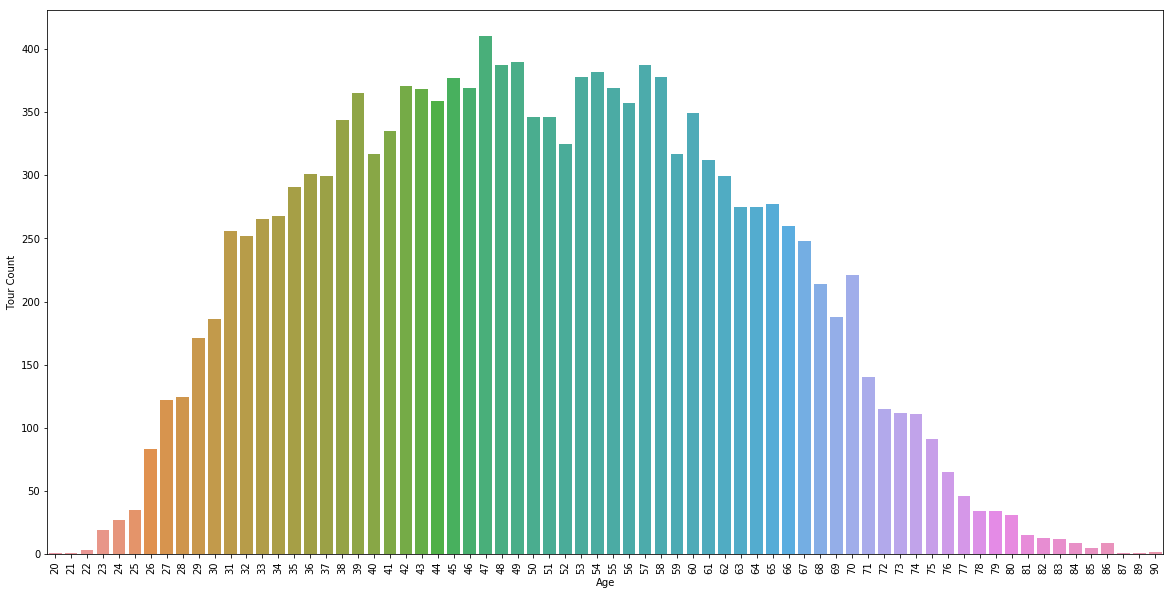

Millenials vs Other Generations Differences in VPG:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3601.767 : -832.375 )

Millenials vs Other Generations Differences in Close Rate:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -0.073 : -0.009 )

---------------------------------------------------------------------
Gen X vs Other Generations Differences in VPG:
Probablility They Have Same Mean:  0.03417
Range of True Difference in Means: ( -502.949 : 1704.143 )

Gen X vs Other Generations Differences in Close Rate:
Probablility They Have Same Mean:  0.00094
Range of True Difference in Means: ( -0.004 : 0.047 )

---------------------------------------------------------------------
Baby Boomers vs Other Generations Differences in VPG:
Probablility They Have Same Mean:  0.00015
Range of True Difference in Means: ( -31.021 : 2206.739 )

Baby Boomers vs Othe

In [5]:
#increase  figure size
mpl.rcParams['figure.figsize'] = (20,10)

sns.countplot(x= 'Age', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.show()

dfMillenials = df[df.Age < 38]
dfNotMillenials = df[df.Age >= 38]

print('Millenials vs Other Generations Differences in VPG:')
zTest(df,dfMillenials,dfNotMillenials, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Millenials vs Other Generations Differences in Close Rate:')
zTest(df,dfMillenials,dfNotMillenials, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

dfGenX = df[(df.Age >= 38) & (df.Age < 54 )]
dfNotGenX = df[(df.Age < 38) | (df.Age >= 54)]

print('Gen X vs Other Generations Differences in VPG:')
zTest(df,dfGenX,dfNotGenX, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Gen X vs Other Generations Differences in Close Rate:')
zTest(df,dfGenX,dfNotGenX, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

dfBB = df[(df.Age >= 54) & (df.Age < 73 )]
dfNotBB = df[(df.Age < 54) | (df.Age >= 73)]

print('Baby Boomers vs Other Generations Differences in VPG:')
zTest(df,dfBB,dfNotBB, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Baby Boomers vs Other Generations Differences in Close Rate:')
zTest(df,dfBB,dfNotBB, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

dfSG = df[(df.Age >= 73) ]
dfNotSG = df[(df.Age < 73)]

print('Silent Gen vs Other Generations Differences in VPG:')
zTest(df,dfSG,dfNotSG, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Silent Gen vs Other Generations Differences in Close Rate:')
zTest(df,dfSG,dfNotSG, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

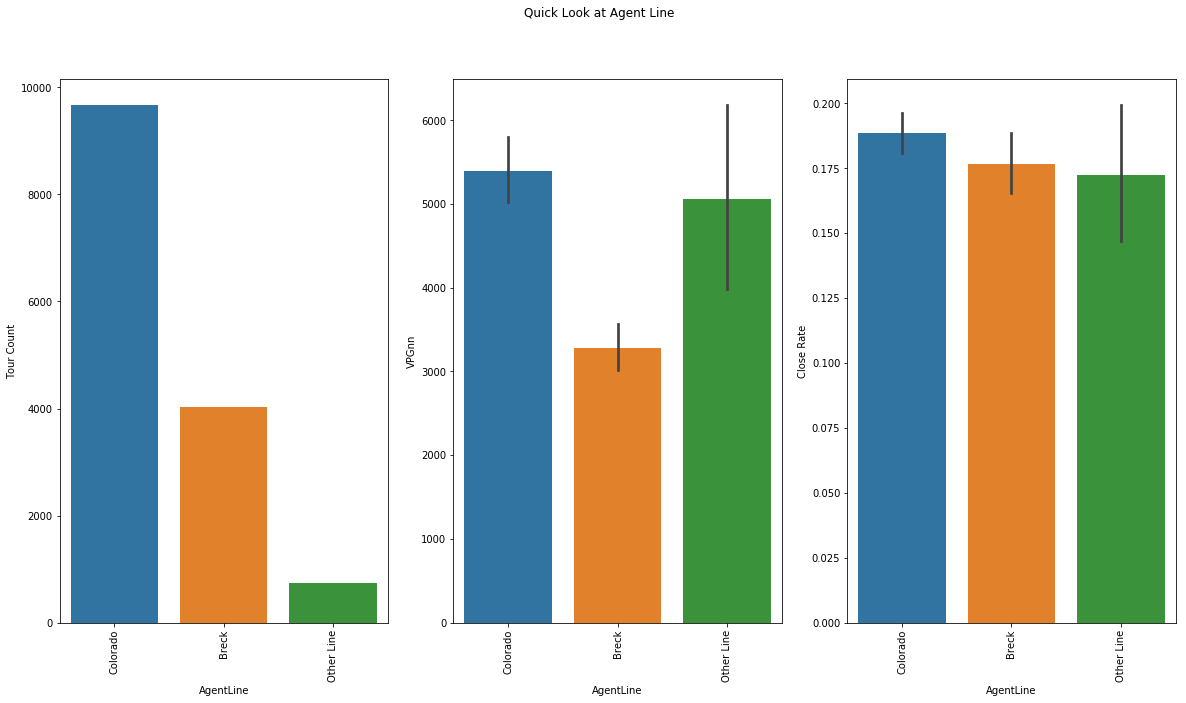

Colorado vs Breck and Other Lines Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 684.494 : 2981.486 )

Colorado vs Breck and Other Lines Differences in Close Rate
Probablility They Have Same Mean:  0.06767
Range of True Difference in Means: ( -0.014 : 0.039 )

---------------------------------------------------------------------
Breck vs Colorado and Other Lines Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3290.608 : -882.23 )

Breck vs Colorado and Other Lines Differences in Close Rate
Probablility They Have Same Mean:  0.13415
Range of True Difference in Means: ( -0.039 : 0.017 )
---------------------------------------------------------------------


In [6]:
plt.subplot(1,3,1)
sns.countplot(x= 'AgentLine', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(x= 'AgentLine', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'AgentLine', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Agent Line')
plt.show()

#Colorado Line Versus Other Line z test
dfColorado = df[df.AgentLine == 'Colorado']
dfNotColorado = df[(df.AgentLine == 'Breck') | (df.AgentLine == 'Other Line')]
dfBreck = df[df.AgentLine == 'Breck']
dfNotBreck = df[(df.AgentLine == 'Colorado') | (df.AgentLine == 'Other Line')]

print('Colorado vs Breck and Other Lines Differences in VPG')
zTest(df,dfColorado,dfNotColorado, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Colorado vs Breck and Other Lines Differences in Close Rate')
zTest(df,dfColorado,dfNotColorado, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

print('Breck vs Colorado and Other Lines Differences in VPG')
zTest(df,dfBreck,dfNotBreck, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Breck vs Colorado and Other Lines Differences in Close Rate')
zTest(df,dfBreck,dfNotBreck, 'ResultOfTour', alpha)
print('---------------------------------------------------------------------')

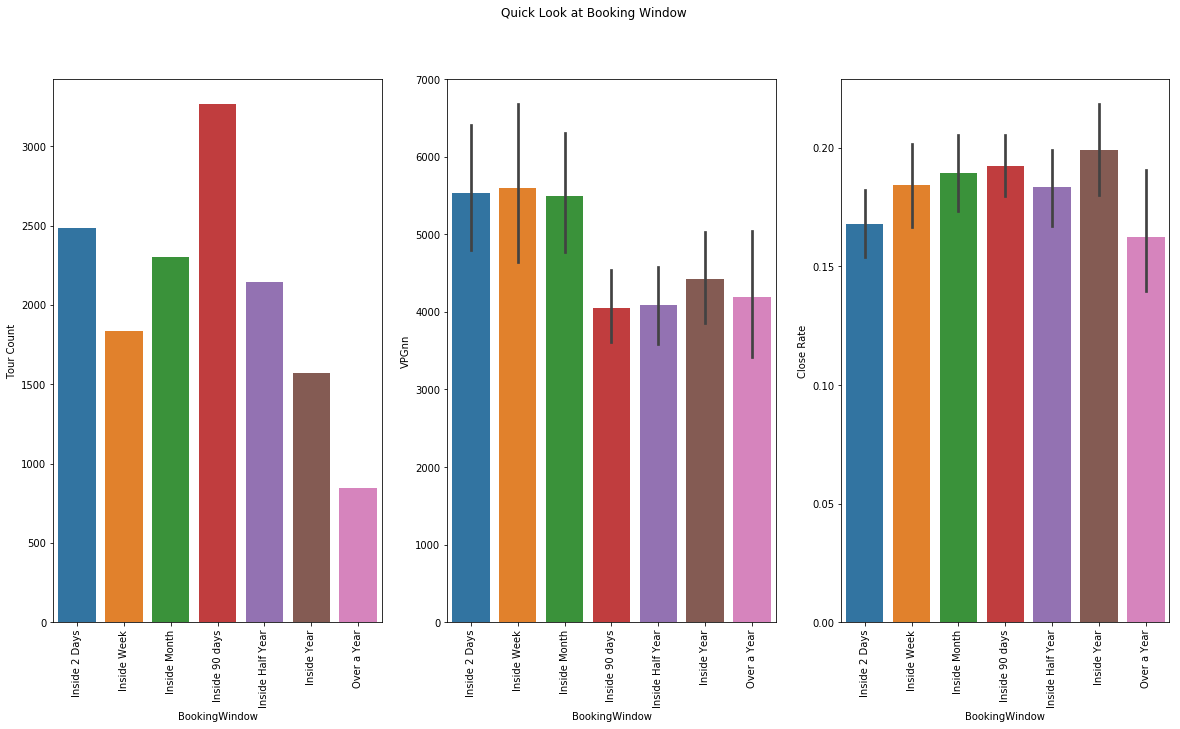

Booked Inside a Week vs Booked Ouside a Week Differences in VPG
Probablility They Have Same Mean:  0.0003
Range of True Difference in Means: ( -83.063 : 2278.12 )

Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate
Probablility They Have Same Mean:  0.05188
Range of True Difference in Means: ( -0.041 : 0.014 )

---------------------------------------------------------------------
Booked Inside a Month vs Booked Ouside a Month Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 298.577 : 2467.614 )

Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate
Probablility They Have Same Mean:  0.20359
Range of True Difference in Means: ( -0.033 : 0.017 )

---------------------------------------------------------------------
Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG
Probablility They Have Same Mean:  0.00579
Range of True Difference in Means: ( -338.458

In [7]:
plt.subplot(1,3,1)
sns.countplot(x= 'BookingWindow', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'BookingWindow',y = 'NetVolumePlusNonGoodVolume', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'BookingWindow',y = 'ResultOfTour', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Booking Window')
plt.show()

#Booked within a month Versus booked outside a month z test
dfInsideMonth = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')]
dfOutsideMonth = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

#Booked within a week Versus booked outside a week z test
dfInsideWeek = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')]
dfOutsideWeek = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')|(df.BookingWindow == 'Inside Month')]

#Booked within 90 days Versus booked outside 90 days z test
dfInside90 = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')|(df.BookingWindow == 'Inside 90 days')]
dfOutside90 = df[(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]


print('Booked Inside a Week vs Booked Ouside a Week Differences in VPG')
zTest(df,dfInsideWeek,dfOutsideWeek, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate')
zTest(df,dfInsideWeek,dfOutsideWeek, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')
print('Booked Inside a Month vs Booked Ouside a Month Differences in VPG')
zTest(df,dfInsideMonth,dfOutsideMonth, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate')
zTest(df,dfInsideMonth,dfOutsideMonth, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')
print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG')
zTest(df,dfInside90,dfOutside90, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in Close Rate')
zTest(df,dfInside90,dfOutside90, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

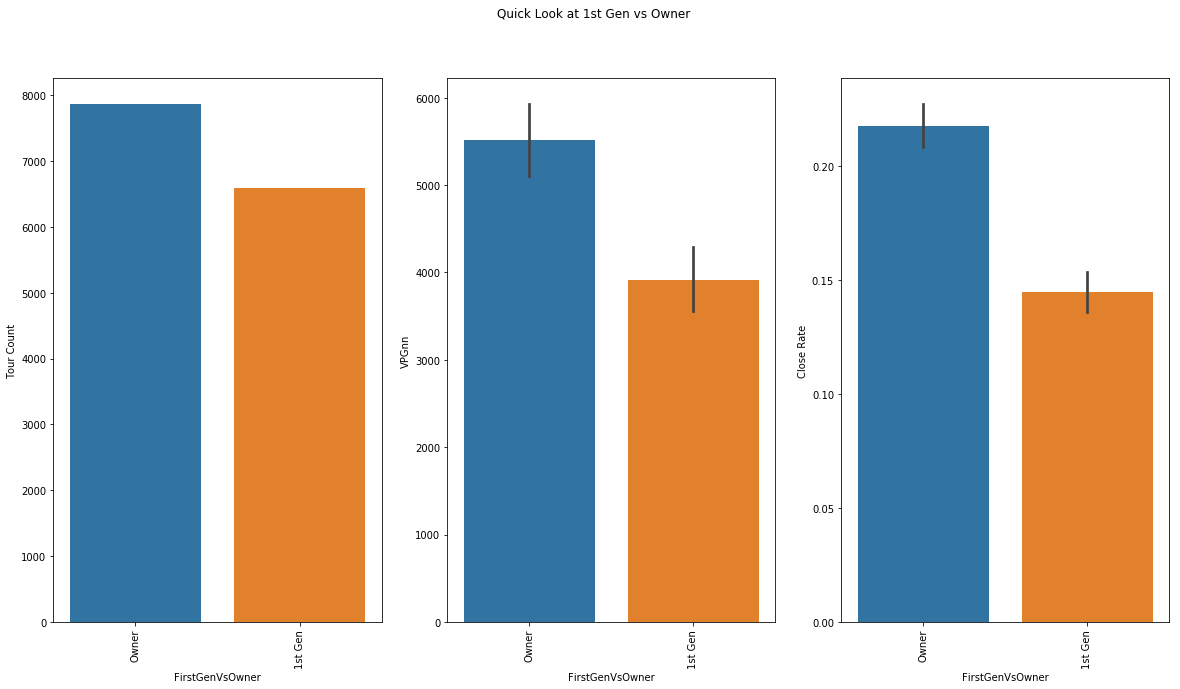

Owner Versus First Gen True Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 526.684 : 2696.1 )

Owner Versus First Gen True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.048 : 0.098 )

---------------------------------------------------------------------


In [8]:
plt.subplot(1,3,1)
sns.countplot(x= 'FirstGenVsOwner', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(x= 'FirstGenVsOwner',y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'FirstGenVsOwner',y = 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at 1st Gen vs Owner')
plt.show()

#bgv owner vs first gen z test
dfOwner = df[df.FirstGenVsOwner == 'Owner']
dfFirstGen = df[df.FirstGenVsOwner == '1st Gen']

print('Owner Versus First Gen True Difference in VPG')
zTest(df,dfOwner,dfFirstGen, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Owner Versus First Gen True Difference in Close Rate')
zTest(df,dfOwner,dfFirstGen, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

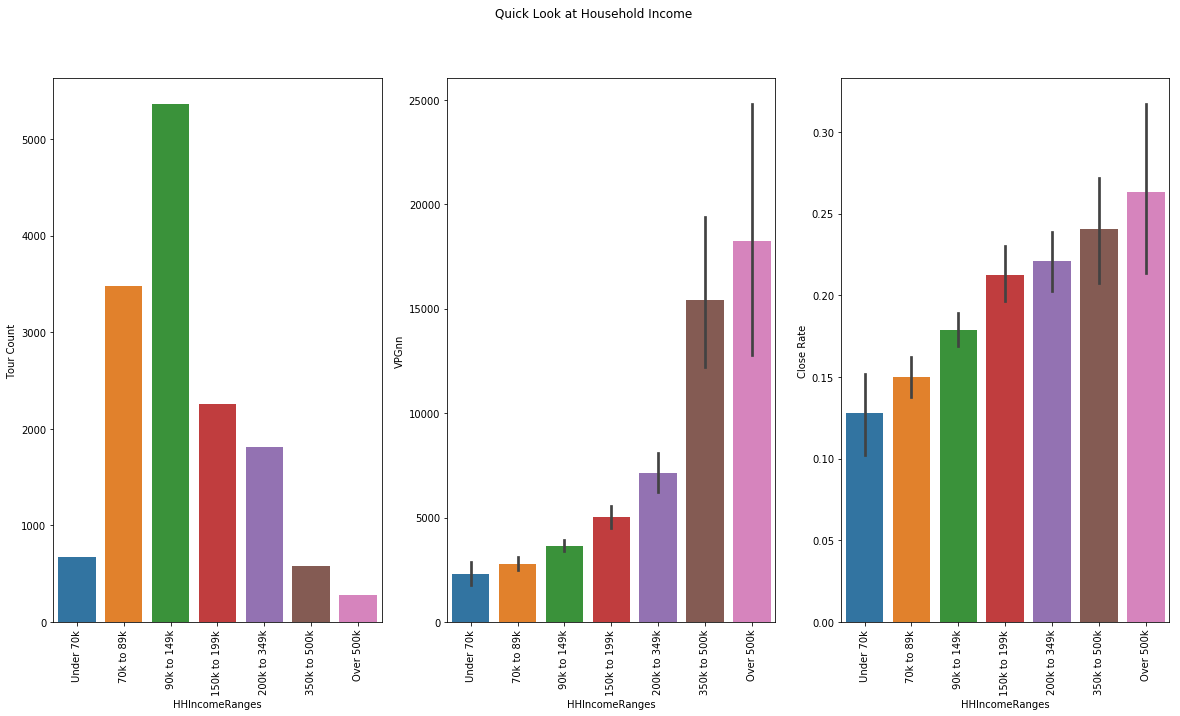

HHI over 350k vs HHI Under 350k Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 10033.585 : 14537.684 )

HHI over 350k vs HHI Under 350k Differences in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.015 : 0.121 )

---------------------------------------------------------------------


In [9]:
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income')
plt.show()

#HHI over 350 Versus HHI Under 350 days z test
dfNotHHI350 = df[(df.HHIncomeRanges == 'Under 70k')|(df.HHIncomeRanges == '70k to 89k')|(df.HHIncomeRanges == '90k to 149k')|(df.HHIncomeRanges == '150k to 199k')|(df.HHIncomeRanges == '200k to 349k')]
dfHHI350 = df[(df.HHIncomeRanges == '350k to 500k')|(df.HHIncomeRanges == 'Over 500k')]
print('HHI over 350k vs HHI Under 350k Differences in VPG')
zTest(df,dfHHI350,dfNotHHI350, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('HHI over 350k vs HHI Under 350k Differences in Close Rate')
zTest(df,dfHHI350,dfNotHHI350, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

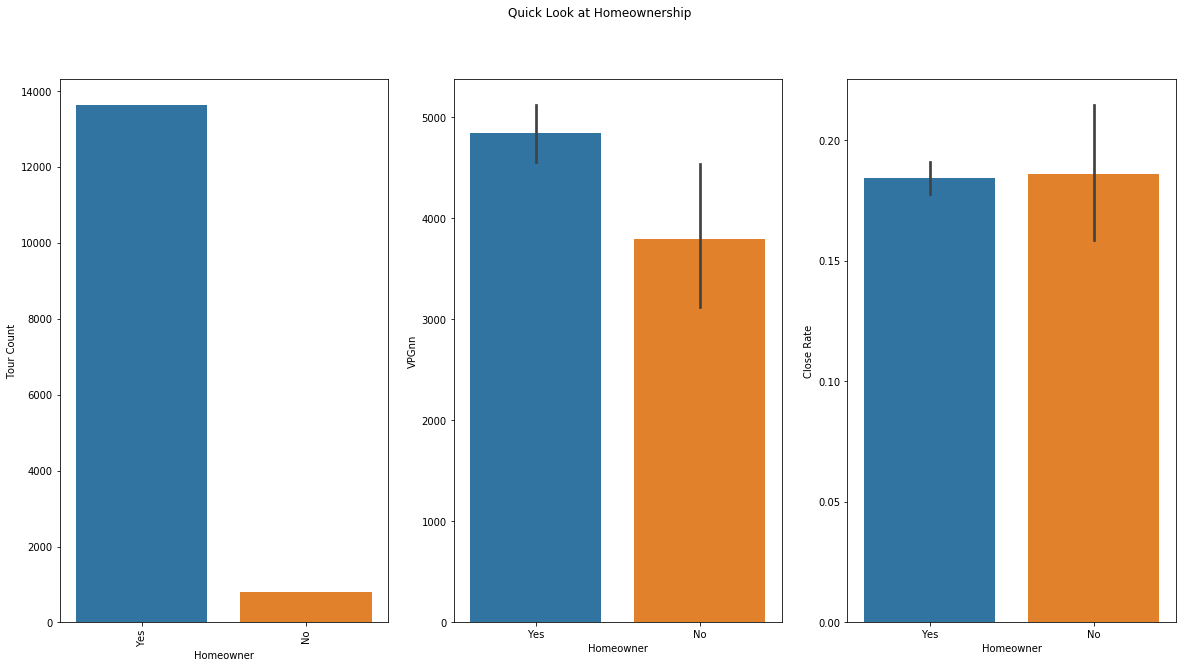

Homeowner Versus Non Homeowner True Difference in VPG
Probablility They Have Same Mean:  0.0845
Range of True Difference in Means: ( -1315.48 : 3410.495 )

Homeowner Versus Non Homeowner True Difference in Close Rate
Probablility They Have Same Mean:  0.89649
Range of True Difference in Means: ( -0.057 : 0.053 )

---------------------------------------------------------------------


In [10]:
plt.subplot(1,3,1)
sns.countplot(x= 'Homeowner', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(y= 'NetVolumePlusNonGoodVolume', x='Homeowner', data= df)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(y= 'ResultOfTour', x='Homeowner', data= df)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Homeownership')
plt.show()

#homeowner z test
dfHY = df[df.Homeowner == 'Yes']
dfHN = df[df.Homeowner == 'No']

print('Homeowner Versus Non Homeowner True Difference in VPG')
zTest(df,dfHY,dfHN, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Homeowner Versus Non Homeowner True Difference in Close Rate')
zTest(df,dfHY,dfHN, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

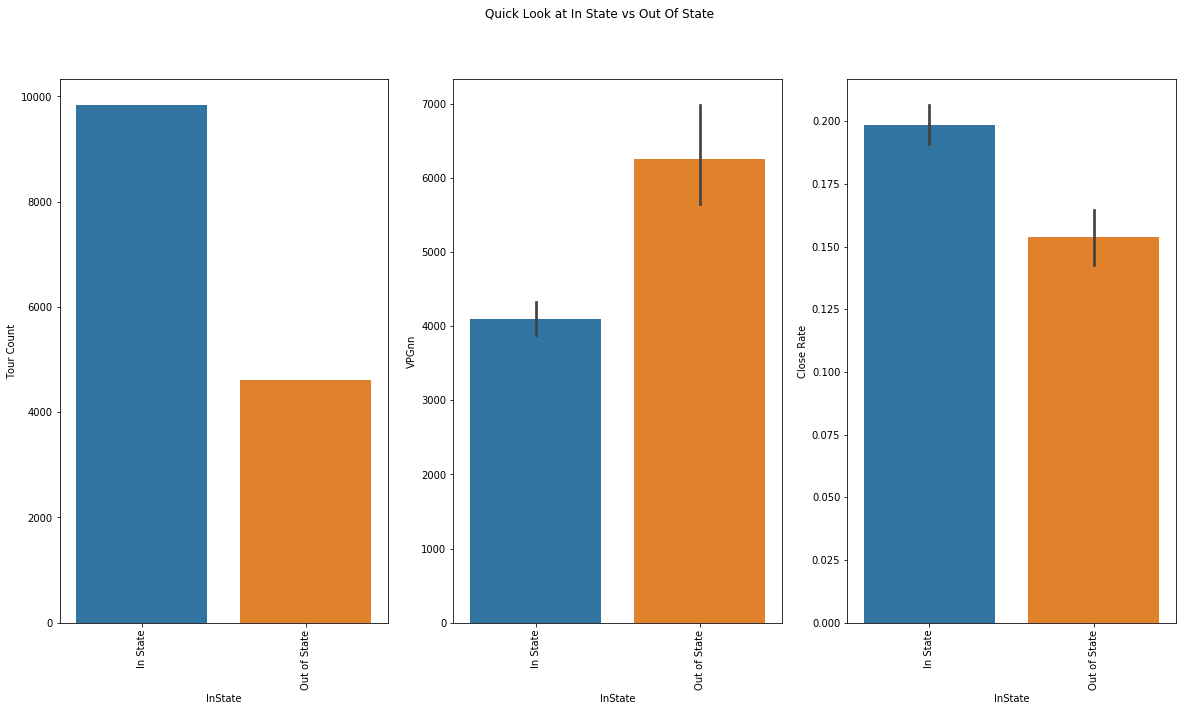

In State Versus Out of State True Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3316.367 : -999.521 )

In State Versus Out of State True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.018 : 0.071 )

---------------------------------------------------------------------


In [11]:
# instate quick look
plt.subplot(1,3,1)
sns.countplot(x= 'InState', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'InState', y='NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'InState', y='ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at In State vs Out Of State')
plt.show()


#in state vs out of state status z test
dfIn = df[df.InState == 'In State']
dfOut = df[df.InState == 'Out of State']

print('In State Versus Out of State True Difference in VPG')
zTest(df,dfIn,dfOut, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('In State Versus Out of State True Difference in Close Rate')
zTest(df,dfIn,dfOut, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

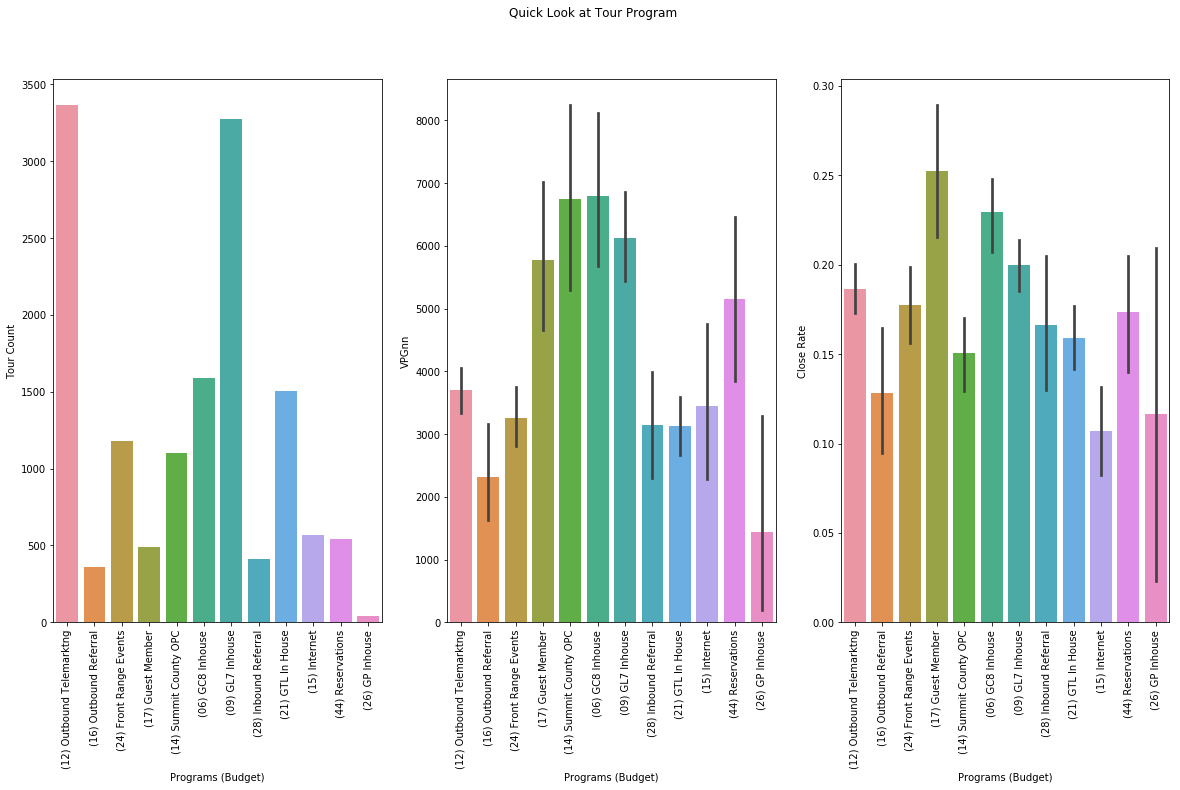

Inhouse programs  vs Non inhouse programs difference in vpg
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 427.497 : 2590.805 )

Inhouse programs  vs Non inhouse programs difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.007 : 0.057 )

---------------------------------------------------------------------


In [12]:
plt.subplot(1,3,1)
sns.countplot(x= 'Programs (Budget)', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'Programs (Budget)', y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'Programs (Budget)', y = 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Program')
plt.show()

#Inhouse programs  vs Non inhouse differnce in vpg z test
dfInhouse = df[(df['Programs (Budget)']=='(06) GC8 Inhouse')|(df['Programs (Budget)']=='(21) GTL In House')|(df['Programs (Budget)']=='(26) GP Inhouse')|(df['Programs (Budget)']=='(09) GL7 Inhouse')|(df['Programs (Budget)']=='(17) Guest Member')]
dfNotInhouse = df[(df['Programs (Budget)']=='(12) Outbound Telemarktng')|(df['Programs (Budget)']=='(16) Outbound Referral')|(df['Programs (Budget)']=='(24) Front Range Events')|(df['Programs (Budget)']=='(14) Summit County OPC')|(df['Programs (Budget)']=='(28) Inbound Referral')|(df['Programs (Budget)']=='(15) Internet')|(df['Programs (Budget)']=='(44) Reservations')]

print('Inhouse programs  vs Non inhouse programs difference in vpg')
zTest(df,dfInhouse,dfNotInhouse, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Inhouse programs  vs Non inhouse programs difference in Close Rate')
zTest(df,dfInhouse,dfNotInhouse, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

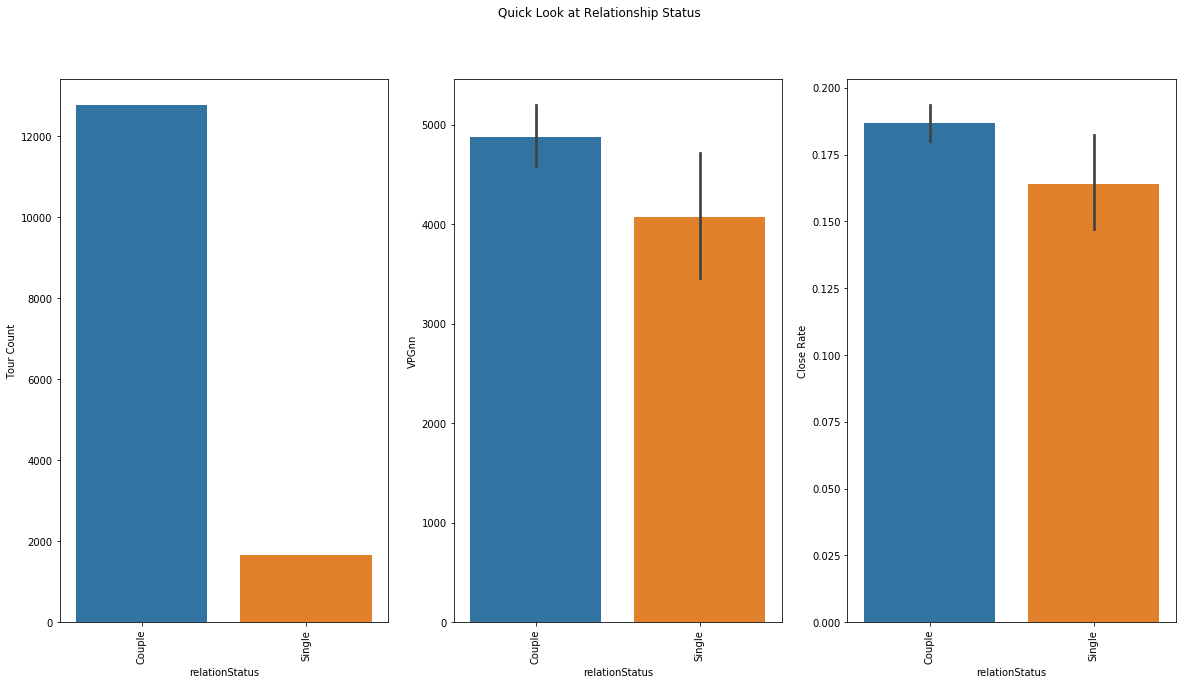

Couples Versus Singles Difference in VPG
Probablility They Have Same Mean:  0.06404
Range of True Difference in Means: ( -889.472 : 2504.508 )

Couples Versus Singles Difference in Close Rate
Probablility They Have Same Mean:  0.02465
Range of True Difference in Means: ( -0.017 : 0.062 )

---------------------------------------------------------------------


In [13]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'relationStatus', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'relationStatus', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'relationStatus', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Relationship Status')
plt.show()


#relationship status z test
dfCouple = df[df.relationStatus == 'Couple']
dfSingle = df[df.relationStatus == 'Single']

print('Couples Versus Singles Difference in VPG')
zTest(df,dfCouple,dfSingle, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Couples Versus Singles Difference in Close Rate')
zTest(df,dfCouple,dfSingle, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

In [14]:
print(df.columns)

Index(['Age', 'AgentLine', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus', 'ResultOfTour', 'NetVolumePlusNonGoodVolume'],
      dtype='object')


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split


dfX = df.drop(['ResultOfTour',  'AgentLine', 'NetVolumePlusNonGoodVolume'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(dfX, df['ResultOfTour'], stratify=df['ResultOfTour'], test_size=0.25,)

dfX = pd.get_dummies(X_train, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])

dfX2 = dfX

dfY = y_train
sm = SMOTE(random_state=42)
dfX1, dfY1 = sm.fit_sample(dfX, dfY)
dfX1= pd.DataFrame(dfX1, columns = dfX2.columns)
dfY1= pd.DataFrame(dfY1)

print(dfX1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17674 entries, 0 to 17673
Data columns (total 35 columns):
Age                                            17674 non-null float64
BookingWindow_Inside 2 Days                    17674 non-null float64
BookingWindow_Inside 90 days                   17674 non-null float64
BookingWindow_Inside Half Year                 17674 non-null float64
BookingWindow_Inside Month                     17674 non-null float64
BookingWindow_Inside Week                      17674 non-null float64
BookingWindow_Inside Year                      17674 non-null float64
BookingWindow_Over a Year                      17674 non-null float64
FirstGenVsOwner_1st Gen                        17674 non-null float64
FirstGenVsOwner_Owner                          17674 non-null float64
HHIncomeRanges_150k to 199k                    17674 non-null float64
HHIncomeRanges_200k to 349k                    17674 non-null float64
HHIncomeRanges_350k to 500k                    1767

In [16]:
dfX2 = df.drop(['ResultOfTour',  'AgentLine', 'NetVolumePlusNonGoodVolume'], axis = 1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(dfX2, df['NetVolumePlusNonGoodVolume'], test_size=0.25)

dfX2 = pd.get_dummies(X_train2, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])


dfY2 = y_train2

print(dfX2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 356151 to 366051
Data columns (total 35 columns):
Age                                            10833 non-null int64
BookingWindow_Inside 2 Days                    10833 non-null uint8
BookingWindow_Inside 90 days                   10833 non-null uint8
BookingWindow_Inside Half Year                 10833 non-null uint8
BookingWindow_Inside Month                     10833 non-null uint8
BookingWindow_Inside Week                      10833 non-null uint8
BookingWindow_Inside Year                      10833 non-null uint8
BookingWindow_Over a Year                      10833 non-null uint8
FirstGenVsOwner_1st Gen                        10833 non-null uint8
FirstGenVsOwner_Owner                          10833 non-null uint8
HHIncomeRanges_150k to 199k                    10833 non-null uint8
HHIncomeRanges_200k to 349k                    10833 non-null uint8
HHIncomeRanges_350k to 500k                    10833 non-null uint8
H

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


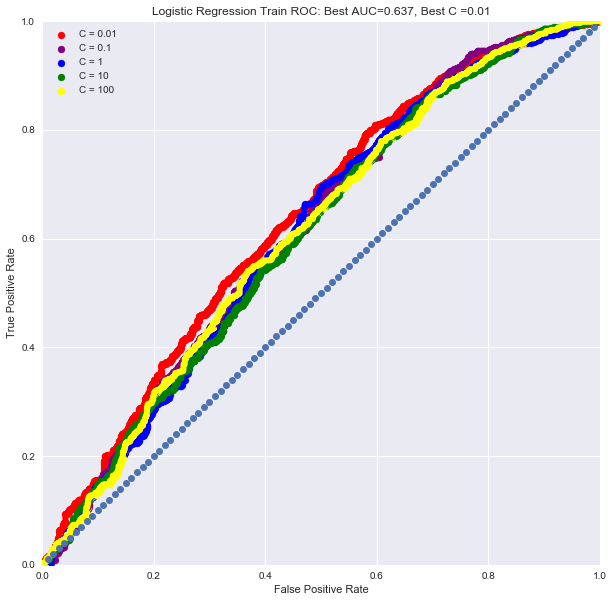

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import brier_score_loss

bestC = 0
bestAUCC = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.01, 0.1, 1,10,100]
kf = StratifiedShuffleSplit(n_splits=5, random_state=42)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    lr = LogisticRegression(C=Cs[i])
    lr.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = lr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCC:
        bestC=Cs[i]
        bestAUCC=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Logistic Regression Train ROC: Best AUC='+str(round(bestAUCC,3))+', Best C ='+str(bestC))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')
plt.show()

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


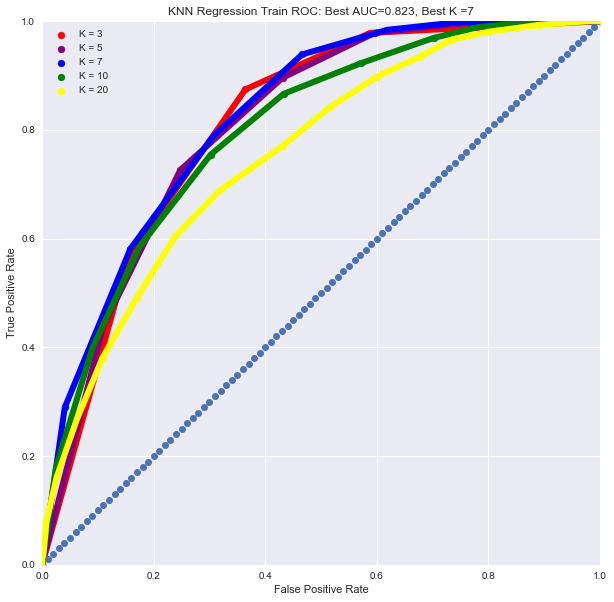

In [18]:
from sklearn.neighbors import KNeighborsClassifier


bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ks = [3,5,7,10,20]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    knn = KNeighborsClassifier(Ks[i])
    knn.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = knn.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=Ks[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(Ks[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Regression Train ROC: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()


C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\U

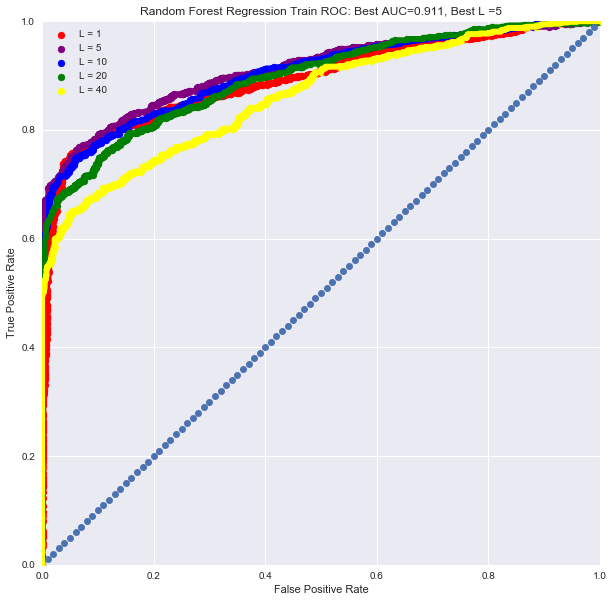

In [19]:
from sklearn.ensemble import RandomForestClassifier

bestL = 0
bestAUCL = 0
bestFeatureImportances= []
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ls = [1,5,10,20,40]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    rfr = RandomForestClassifier(n_estimators=1000,min_samples_leaf=Ls[i])
    rfr.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = rfr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCL:
        bestL=Ls[i]
        bestAUCL=auc
        bestFeatureImportances = rfr.feature_importances_
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='L = '+str(Ls[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Random Forest Regression Train ROC: Best AUC='+str(round(bestAUCL,3))+', Best L ='+str(bestL))
plt.plot(x,y,'o')
plt.show()

[0.09416676 0.25159475 0.24461707 ... 0.13268243 0.13581134 0.23433381]
[0.26019967 0.25416204 0.16727558 ... 0.1791135  0.3093492  0.17877383]
[0.14218967 0.14060497 0.17070796 ... 0.16696809 0.14736006 0.28950798]
[0.17144776 0.16458502 0.19016842 ... 0.2662918  0.24811936 0.20026941]
[0.15734141 0.15616544 0.13870992 ... 0.16575939 0.16390452 0.15766637]


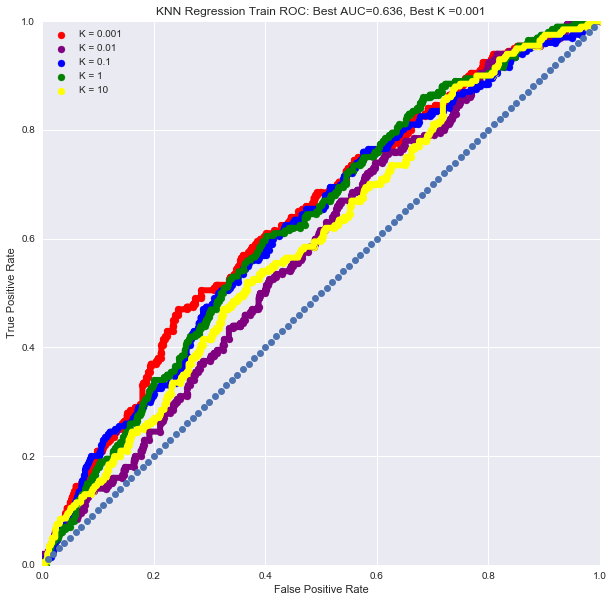

In [20]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge()

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,dfX2,dfY2, cv=5)

bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
As = [0.001,0.01,0.1,1,10]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX,dfY):
    ridge = Ridge(alpha=As[i], normalize=False)
    ridge.fit(dfX.iloc[train.tolist()],dfY.iloc[train.tolist()])
    preds = ridge.predict(dfX.iloc[test.tolist()])
    print(preds)
    fpr, tpr, threshold = metrics.roc_curve(dfY.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=As[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(As[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Regression Train ROC: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
bestLR =0
bestAUCRFR=0
i=0
#make cross validation of K values and kfold
Ls = [1,5,10,20,40]
kf = KFold(5)




for train, test in kf.split(dfX2,dfY2):
    rfr = RandomForestRegressor(n_estimators=100,min_samples_leaf=Ls[i])
    rfr.fit(dfX2.iloc[train.tolist()],dfY2.iloc[train.tolist()])
    preds = rfr.predict(dfX2.iloc[test.tolist()])
    print(max(preds))
    print(rfr.score(dfX2.iloc[test.tolist()],dfY2.iloc[test.tolist()]))
    i += 1 
    


230935.0
-0.47352972000007587
59229.959480139136
-0.025860305254924224
54380.94425288639
0.014273290541549688
38211.509977890506
-0.0003767126476821314
26214.269435129765
0.02463903691366609


In [22]:
import tabpy_client
# Connect to TabPy server using the client library
connection = tabpy_client.Client('http://localhost:9004/')

In [23]:
# tabpy code for is Buyer


model = RandomForestClassifier(n_estimators=1000,min_samples_leaf=bestL)
model.fit(dfX1,dfY1)

a=0
print('Feature Importances:')
for i in dfX2.columns:
    print(i, ': ', +model.feature_importances_[a])
    a+=1

def isBuyer(Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus):
    
    X = pd.DataFrame(np.column_stack([Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus]), columns =['Age', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    X.Age =X.Age.astype(int)
    
    X = pd.get_dummies(X, columns = None ,prefix=[ 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    
    missing_cols = set( dfX2.columns ) - set( X.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        X[c] = 0
    
    # Ensure the order of column in the test set is in the same order than in train set
    X = X[dfX2.columns]
    
    
    print('Probability of Buying:')
    return str(model.predict_proba(X)[:,1])


C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Feature Importances:
Age :  0.0964629654420392
BookingWindow_Inside 2 Days :  0.03451951898437965
BookingWindow_Inside 90 days :  0.04520296173652331
BookingWindow_Inside Half Year :  0.030336524643475096
BookingWindow_Inside Month :  0.03906356264947389
BookingWindow_Inside Week :  0.024888572172286603
BookingWindow_Inside Year :  0.02766755206990167
BookingWindow_Over a Year :  0.013509499375191684
FirstGenVsOwner_1st Gen :  0.04367726270882949
FirstGenVsOwner_Owner :  0.04230544998196353
HHIncomeRanges_150k to 199k :  0.036115150622595626
HHIncomeRanges_200k to 349k :  0.03465700074762081
HHIncomeRanges_350k to 500k :  0.016888417552940738
HHIncomeRanges_70k to 89k :  0.06410960655259336
HHIncomeRanges_90k to 149k :  0.05355326178709238
HHIncomeRanges_Over 500k :  0.011582788225444922
HHIncomeRanges_Under 70k :  0.02028172719868204
Homeowner_No :  0.009329968321918816
Homeowner_Yes :  0.010072500067719078
InState_In State :  0.04546482000610977
InState_Out of State :  0.044906916710

In [24]:
# tabpy code for isWorth


model2 = RandomForestRegressor(n_estimators=1000,min_samples_leaf=bestL)
model2.fit(dfX2,dfY2)

a=0
print('Feature Importances:')
for i in dfX2.columns:
    print(i, ': ', +model2.feature_importances_[a])
    a+=1

def isWorth(Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus):
    
    X = pd.DataFrame(np.column_stack([Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus]), columns =['Age', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    X.Age =X.Age.astype(int)
    
    X = pd.get_dummies(X, columns = None ,prefix=[ 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    
    missing_cols = set( dfX2.columns ) - set( X.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        X[c] = 0
    
    # Ensure the order of column in the test set is in the same order than in train set
    X = X[dfX2.columns]
    
    print('Amount Would Buy:')
    return str(model2.predict(X))


Feature Importances:
Age :  0.4175195282286317
BookingWindow_Inside 2 Days :  0.03093053316313957
BookingWindow_Inside 90 days :  0.01850744846129207
BookingWindow_Inside Half Year :  0.017501136568361334
BookingWindow_Inside Month :  0.02357656214294248
BookingWindow_Inside Week :  0.05335377666248861
BookingWindow_Inside Year :  0.013708431199214562
BookingWindow_Over a Year :  0.007003014472960246
FirstGenVsOwner_1st Gen :  0.01691591002651556
FirstGenVsOwner_Owner :  0.013703081876866799
HHIncomeRanges_150k to 199k :  0.009311870159304141
HHIncomeRanges_200k to 349k :  0.017876644139657318
HHIncomeRanges_350k to 500k :  0.045301249107761385
HHIncomeRanges_70k to 89k :  0.009218707694213351
HHIncomeRanges_90k to 149k :  0.011493918305920532
HHIncomeRanges_Over 500k :  0.038925384677086644
HHIncomeRanges_Under 70k :  0.0016657978002130754
Homeowner_No :  0.0036284785112293354
Homeowner_Yes :  0.003307030620008171
InState_In State :  0.031097920887510604
InState_Out of State :  0.0277

In [25]:
#            Age, Bookingwindow, Ownvs1st,      HHI,  Homeowner,   Instate,           Program,    RelationStatus
#              |         |           |           |        |          |                  |              |
print(isBuyer(45,'Inside 2 Days', 'Owner', 'Over 500k', 'Yes', 'Out of State', '(17) Guest Member', 'Couple'))
print()
print(isWorth(45,'Inside 2 Days', 'Owner', 'Over 500k', 'Yes', 'Out of State', '(17) Guest Member', 'Couple'))

Probability of Buying:
[0.52062833]

Amount Would Buy:
[9080.16894895]


In [26]:
# Publish the isBuyer function to TabPy server so it can be used from Tableau
# Using the name DiagnosticsDemo and a short description of what it does
connection.deploy('BuyerPrediction',
                  isBuyer,
                  'Returns prediction of buying based on random forest classifier model trained using clean data from 12/1/16-2/28/2018')

ConnectionError: HTTPConnectionPool(host='localhost', port=9004): Max retries exceeded with url: /endpoints (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002096F6BA630>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it',))

In [ ]:
from sklearn.feature_selection import RFE
i=0
bestF =0
bestAUCF =0
bestMask =[]

Fs = [9,8,7,6,5]


for train, test in kf.split(dfX1,dfY1):
    model = RandomForestClassifier(n_estimators=1000,min_samples_leaf=bestL)
    # create the RFE model and select 3 attributes
    rfe = RFE(model,Fs[i], step =1)
    rfe = rfe.fit(dfX1.iloc[train.tolist()], dfY1.iloc[train.tolist()])
    preds = rfe.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)    
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCF:
        bestF=Fs[i]
        bestAUCF=auc
        bestMask = list(df.drop(['NetVolumePlusNonGoodVolume','ResultOfTour'], axis=1).columns[rfe.support_])
        plt.title('Recursive Feature Elimination: Best Number of Features is ' + str(len(bestMask)))
    i+=1
    #plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
    plt.scatter(x=fpr, y=tpr, color = colors[i-1] , label= 'Random Forest RFE ' +str(rfe.n_features_)+' Features AUC = '+str(round(auc,3)))
    plt.plot(fpr,tpr,color= colors[i-1],linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.plot(x,y,'o')
plt.show()

print('Selected Features: ',bestMask)
print()
print('Not Selected Features:',listDiff(df.drop(['NetVolumePlusNonGoodVolume','ResultOfTour'], axis=1).columns.tolist(),bestMask))